In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
# import opendatasets as od
import json
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval

# Loading the data set 

In [4]:
df = pd.read_csv("../Datasets/TheMoviesDataset/ratings.csv")
# df = df.sample(frac = 1).reset_index()
# df.drop('index', axis=1, inplace=True)

In [5]:
df.shape

(26024289, 4)

# Let's Explore the data set 

In [6]:
df.head(1)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [9]:
len(df)

26024289

In [11]:
features = df.columns
for i in features:
    print(i,df[i].isna().sum())

userId 0
movieId 0
rating 0
timestamp 0


In [12]:
for i in features:
    print(i,df[i].value_counts())

userId 45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
30155         1
9641          1
164717        1
243426        1
234625        1
Name: userId, Length: 270896, dtype: int64
movieId 356       91921
318       91082
296       87901
593       84078
2571      77960
          ...  
175753        1
175513        1
174821        1
163054        1
171221        1
Name: movieId, Length: 45115, dtype: int64
rating 4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: rating, dtype: int64
timestamp 825638400     685
1485450595    280
1462647814    264
1490758295    233
1469059264    223
             ... 
1129026458      1
1129028829      1
1129027512      1
1129029528      1
1257031858      1
Name: timestamp, Length: 20549435, dtype: int64


In [13]:
features = list(df.columns.values)
for i in features:
    bool_series = pd.notnull(df[i])
    print(len(df[bool_series]))

26024289
26024289
26024289
26024289


## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [15]:
df.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [22]:
mid = []
mar = []
for i in list(df['movieId'].unique()):
    mid.append(i)
    mar.append(df[df['movieId']==i]['rating'].mean())

In [34]:
smid, smar = zip(*sorted(zip(mid, mar)))

In [35]:
smid = list(smid)
smar = list(smar)

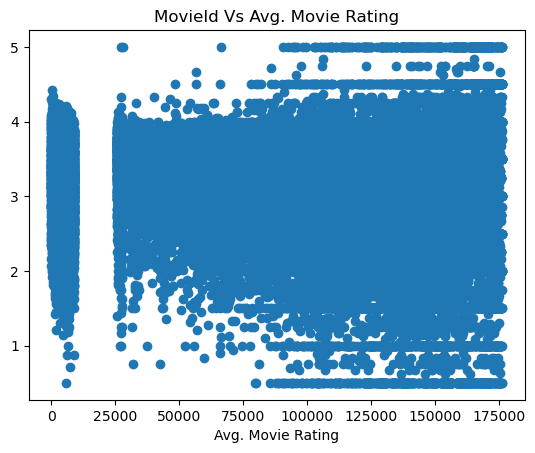

In [49]:
plt.scatter(smid, smar)
plt.xlabel("MovieId")
plt.xlabel("Avg. Movie Rating")
plt.title('MovieId Vs Avg. Movie Rating')
plt.show()

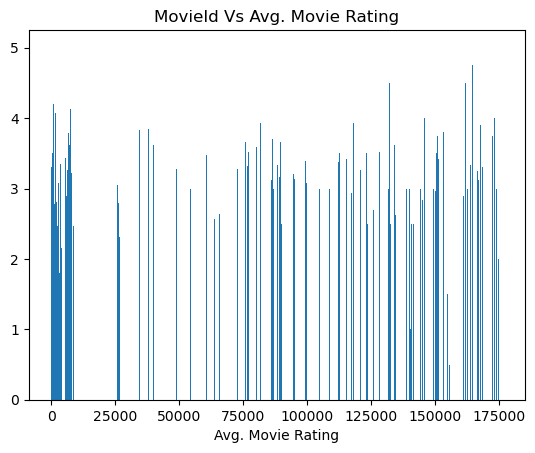

In [48]:
plt.bar(smid, smar)
plt.xlabel("MovieId")
plt.xlabel("Avg. Movie Rating")
plt.title('MovieId Vs Avg. Movie Rating')
plt.show()

<AxesSubplot: xlabel='userId', ylabel='Density'>

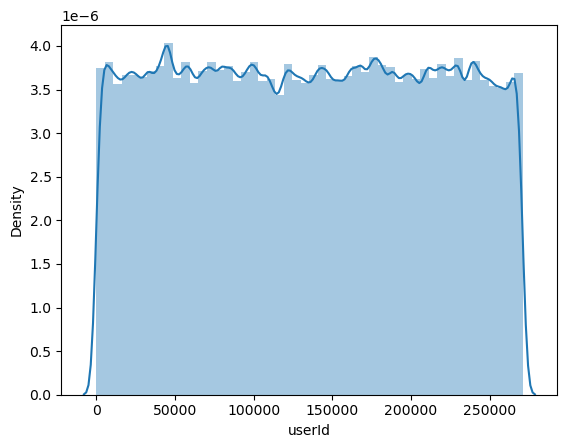

In [50]:
warnings.filterwarnings("ignore")
sb.distplot(df['userId'],kde=True)

<AxesSubplot: xlabel='movieId', ylabel='Density'>

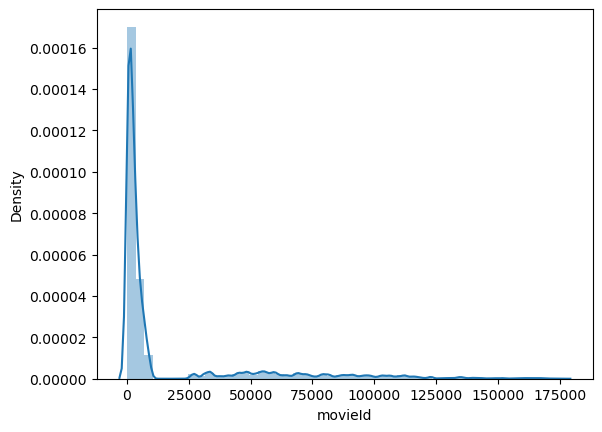

In [52]:
sb.distplot(df['movieId'],kde=True)

<AxesSubplot: xlabel='rating', ylabel='Density'>

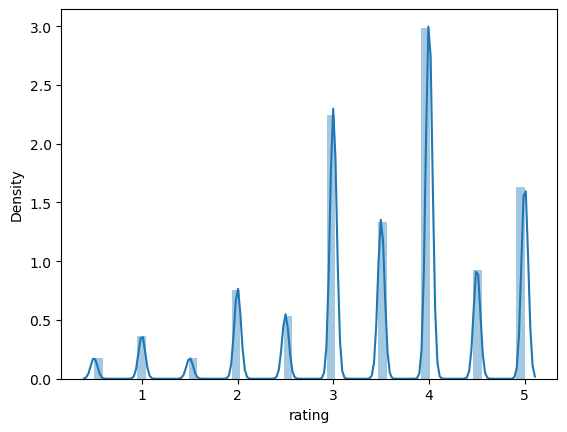

In [54]:
sb.distplot(df['rating'],kde=True)

<AxesSubplot: xlabel='timestamp', ylabel='Density'>

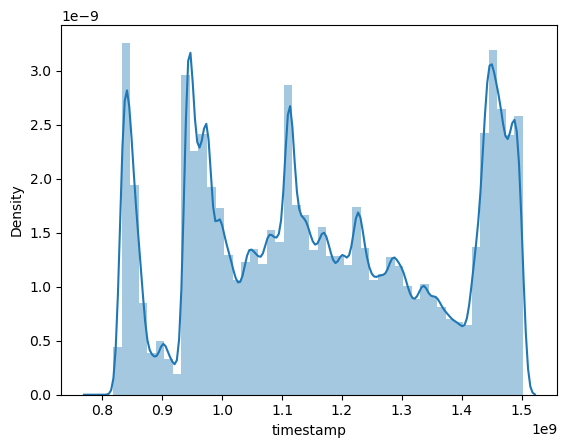

In [56]:
sb.distplot(df['timestamp'],kde=True)

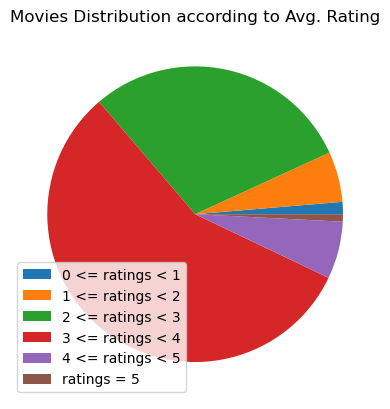

In [69]:
import math
rts = [0,1,2,3,4,5]
crts = [0,0,0,0,0,0]
for i in smar:
    crts[math.floor(i)] += 1
plt.pie(crts)
labels = ['0 <= ratings < 1', '1 <= ratings < 2', '2 <= ratings < 3', '3 <= ratings < 4', '4 <= ratings < 5', 'ratings = 5']
plt.legend(labels, loc="best")
plt.title('Movies Distribution according to Avg. Rating')
plt.show() 